In [12]:
import torch

In [14]:
# PYTORCH BASICS
w = torch.tensor(3.0)
x = torch.tensor(4.0, requires_grad=True)
c = torch.tensor(5.0, requires_grad=True)
y = w * x + c
y

tensor(17., grad_fn=<AddBackward0>)

In [15]:
y.backward()

In [16]:
print(x.grad)
print(c.grad)

tensor(3.)
tensor(1.)


In [18]:
# LINEAR REGRESSION
import numpy as np
# Input is (temp, rainfall, humidity). Targets are (apples, oranges)
inputs = np.array([[73,67,43],
                 [91,88,64],
                 [87,134,58],
                 [102,43,37],
                 [69,96,70]], dtype='float32')
targets = np.array([[56,70],
                    [81, 101],
                    [119,133],
                    [22,37],
                    [103,119]], dtype='float32')

# Data was loaded into numpy arrays as typically you would load it into numpy array, do some processing then convert to torch tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [22]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.6371,  0.3261, -0.3923],
        [ 2.0318, -0.1967, -1.2720]], requires_grad=True)
tensor([0.8543, 1.4168], requires_grad=True)


In [23]:
def model(x):
    # Note that b is a vector. It is broadcasted i.e. copies are made of it so that a matrix matching dimensions of x @ w.t() is made
    return x @ w.t() + b  # @ is matrix multiplication in pytorch

In [25]:
# Generate predictions
predictions = model(inputs)
print(predictions)

tensor([[ 52.3445,  81.8644],
        [ 62.4229,  87.5947],
        [ 77.2280,  78.0512],
        [ 65.3487, 153.1391],
        [ 48.6612,  33.6899]], grad_fn=<AddBackward0>)


In [26]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [27]:
# Mean-squared error
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

loss = mse(predictions, targets)
print(loss)

tensor(3104.1133, grad_fn=<DivBackward0>)


In [28]:
loss.backward()

In [31]:
print(w)
print(w.grad)

tensor([[ 0.6371,  0.3261, -0.3923],
        [ 2.0318, -0.1967, -1.2720]], requires_grad=True)
tensor([[ -983.8682, -2165.9375, -1193.7427],
        [  165.0920, -2188.7368, -1041.8726]])


In [32]:
print(b)
print(b.grad)

tensor([0.8543, 1.4168], requires_grad=True)
tensor([-14.9989,  -5.1321])


In [33]:
# Pytorch accummulates gradients each time we call .backward() so we must reset gradients to 0 before calling .backward() again
w.grad.zero_()
b.grad.zero_()

tensor([0., 0.])

In [75]:
# Train for 100 epochs - gradient descent
for i in range(100):
    predictions = model(inputs)
    loss = mse(predictions, targets)
    loss.backward()
    with torch.no_grad():  # This means don't calculate or modify gradients as w and b change
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [76]:
print(loss)

tensor(5.6930, grad_fn=<DivBackward0>)


In [5]:
# The above is obviously so common that it is already implemented in pytorch
import torch
import torch.nn as nn  # A linear regression is the simplest neural network that can be built
import numpy as np

In [7]:
# Inputs = (temp, rainfall, humidity)
inputs = np.array([[73,67,43],[91,88,64],[87,134,58],[102,43,37],[69,96,70],
                   [73,67,43],[91,88,64],[87,134,58],[102,43,37],[69,96,70],
                   [73,67,43],[91,88,64],[87,134,58],[102,43,37],[69,96,70]], dtype='float32')

# Targets = (apples, oranges)
targets = np.array([[56,70],[81, 101],[119,133],[22,37],[103,119],
                    [56,70],[81, 101],[119,133],[22,37],[103,119],
                    [56,70],[81, 101],[119,133],[22,37],[103,119]], dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [8]:
# TensorDataset allows access to rows from inputs and targets as tuples and provides standard APIs for processing
# Remember that in ML we often work with huge data sets that cannot all be stored in memory also multiplying these
# huge matrices would be very costly so we would normally want to access a few rows at a time
from torch.utils.data import TensorDataset

In [15]:
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [16]:
train_ds[[1, 3, 5, 7]]

(tensor([[ 91.,  88.,  64.],
         [102.,  43.,  37.],
         [ 73.,  67.,  43.],
         [ 87., 134.,  58.]]),
 tensor([[ 81., 101.],
         [ 22.,  37.],
         [ 56.,  70.],
         [119., 133.]]))

In [17]:
# Can split the data into into predefined batch sizes while training as well as allowing shuffling and 
# random sampling of the data
from torch.utils.data import DataLoader

In [18]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)  # This data loader shuffles the data first
                                                           # before creating batches out of it


In [22]:
# print 1 of 3 batches of data
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[102.,  43.,  37.],
        [ 91.,  88.,  64.],
        [ 73.,  67.,  43.],
        [ 69.,  96.,  70.],
        [ 69.,  96.,  70.]])
tensor([[ 22.,  37.],
        [ 81., 101.],
        [ 56.,  70.],
        [103., 119.],
        [103., 119.]])


In [27]:
# Instead of initializing weights and biases manually, we can define the model using the nn.Linear class
# from pytorch, which does it automatically
# Define model
model = nn.Linear(3, 2)  # There are 3 inputs (temp, rainfall, humidity) and 2 outputs (apples, oranges)
# nn.Linear can also be thought of as producing one layer of a neural network
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4860,  0.5527,  0.3189],
        [-0.2783,  0.4050,  0.2947]], requires_grad=True)
Parameter containing:
tensor([-0.2110, -0.1666], requires_grad=True)


In [29]:
# Returns a list of all the weights and biases present in the model
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.4860,  0.5527,  0.3189],
         [-0.2783,  0.4050,  0.2947]], requires_grad=True),
 Parameter containing:
 tensor([-0.2110, -0.1666], requires_grad=True)]

In [30]:
predictions = model(inputs)
predictions

tensor([[ 86.0146,  19.3207],
        [113.0675,  29.0040],
        [134.6361,  46.9773],
        [ 84.9295,  -0.2382],
        [108.7108,  40.1352],
        [ 86.0146,  19.3207],
        [113.0675,  29.0040],
        [134.6361,  46.9773],
        [ 84.9295,  -0.2382],
        [108.7108,  40.1352],
        [ 86.0146,  19.3207],
        [113.0675,  29.0040],
        [134.6361,  46.9773],
        [ 84.9295,  -0.2382],
        [108.7108,  40.1352]], grad_fn=<AddmmBackward>)

In [31]:
import torch.nn.functional as F

In [32]:
# Use the built-in loss function mse_loss
loss_fn = F.mse_loss

In [35]:
# Calculate the loss function for our current predictions
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(2892.4468, grad_fn=<MseLossBackward>)


In [36]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)  # stochastic gradient descent
                                                    # stochastic because batches are selected randomly

In [38]:
# Train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        # Train with batches of data
        for xb, yb in train_dl:
            predictions = model(xb)  # generate predictions
            loss = loss_fn(predictions, yb)  # calculate loss
            loss.backward()  # compute gradients
            opt.step()  # update parameters using gradients
            opt.zero_grad()  # reset the gradients to zero

        # Print the progress
        if (epoch + 1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))

In [39]:
fit(100, model, loss_fn, opt)

Epoch [10/100], Loss: 170.8693
Epoch [20/100], Loss: 137.3609
Epoch [30/100], Loss: 77.4240
Epoch [40/100], Loss: 122.2342
Epoch [50/100], Loss: 24.8155
Epoch [60/100], Loss: 41.4938
Epoch [70/100], Loss: 43.9677
Epoch [80/100], Loss: 14.1741
Epoch [90/100], Loss: 19.5385
Epoch [100/100], Loss: 15.9343


In [41]:
# Compare predictions with targets
predictions = model(inputs)
print(predictions)
print(targets)

tensor([[ 58.3265,  70.9048],
        [ 80.7380,  98.7770],
        [119.6797, 136.2717],
        [ 28.2010,  40.4335],
        [ 95.2029, 113.8197],
        [ 58.3265,  70.9048],
        [ 80.7380,  98.7770],
        [119.6797, 136.2717],
        [ 28.2010,  40.4335],
        [ 95.2029, 113.8197],
        [ 58.3265,  70.9048],
        [ 80.7380,  98.7770],
        [119.6797, 136.2717],
        [ 28.2010,  40.4335],
        [ 95.2029, 113.8197]], grad_fn=<AddmmBackward>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [43]:
# IMAGE CLASSIFICATION WITH LOGISTIC REGRESSION
# Will use MNIST data set
# Each data point is an image while the target is a digit - classification problem
import torch
import torchvision  # pytorch helper library for computer vision
from torchvision.datasets import MNIST

In [44]:
# Download training dataset into data/ directory next to the notebook
dataset = MNIST(root='data/', download=True)  # A pytorch Dataset is created

0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz to data/MNIST/raw/train-images-idx3-ubyte.gz
 98%|█████████▊| 9682944/9912422 [00:05<00:00, 2980550.45it/s]Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz to data/MNIST/raw/train-labels-idx1-ubyte.gz

  0%|          | 0/28881 [00:00<?, ?it/s]

0it [00:00, ?it/s]Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


  0%|          | 0/1648877 [00:00<?, ?it/s]

  1%|          | 16384/1648877 [00:00<00:14, 112381.66it/s]

  6%|▋         | 106496/1648877 [00:00<00:10, 152387.38it/s]

 20%|██        | 335872/1648877 [00:00<00:06, 211624.18it/s]

 27%|██▋       | 442368/1648877 [00:00<00:04, 276343.80it/s]

 46%|████▌     | 753664/1648877 [00:00<00:02, 375458.64it/s]

9920512it [00:07, 1360912.52it/s]                             
32768it [00:01, 25359.59it/s]            




In [45]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1275A12B0>, 5)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


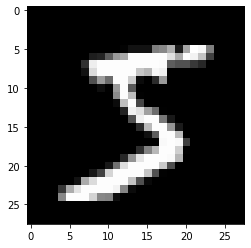

In [48]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


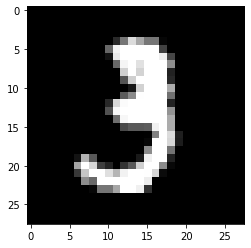

In [49]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [50]:
# Pytorch doesn't know how to work with images so we must convert them to tensors first
import torchvision.transforms as transforms

In [51]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())  # transform dataset to tensor

In [52]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)  # If the first dimension was greater than 1 then that would repersent a                                 # colour image. The other dimensions are width and height of the image.

torch.Size([1, 28, 28]) 5


In [56]:
# Print pixels with between x value of 10 to 15 and y value of 10 to 15
print(img_tensor[:,10:15,10:15])  # 0 is black and 1 is white
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


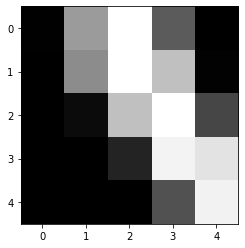

In [63]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [64]:
# Note the difference between a validation set and a test set
# The validation set is used to evaluate the MODEL while training (prevent overfitting) and adjust hyperparamaters like
# learning rate so that the best version of that particular model is picked
# The test set is used to compare DIFFERENT MODELS or types of modelling approaches across different researchers and report the final accuracy of the model
# The MNIST dataset has 60,000 training images and 10,000 test images. The test set is standarsized so
# that different researchers can report the results of their models against the same set of images.
# Since there is no predefined validation set, the 60,000 training images must be split manually into
# training and validation sets.

In [65]:
# Define a function that randomply picks a fraction of the training images for the validation set
import numpy as np

def split_indices(n, proportion):
    # Determine size of validation set
    n_val = int(proportion * n)
    # Create random permutation of 0 to n-1
    idxs = np.random.permutation(n)  # shuffling is important as training images are often ordered by
                                     # target labels i.e. images of 0s, followed by images of 1s, etc.
    # Pick first n_val indices for validation set and remainder for training set
    return idxs[n_val:], idxs[:n_val]

In [66]:
train_indices, val_indices = split_indices(len(dataset), proportion=0.2)

In [67]:
print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [56771  7139 54347 42385 32284 33254 34144 24802 37387 47476  4351 17656
 57722  9934 34992 16861 26993 41957  6471 51371]


In [69]:
from torch.utils.data.sampler import SubsetRandomSampler  # samples elements randomly from the 
                                                          # given list of indices
from torch.utils.data.dataloader import DataLoader  # generates batches of data

In [71]:
batch_size = 100

# Training sampler and data loader
# When generating batches for training we only use the training indices of the dataset
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

# Validation sampler and data loader
# When generating batches for validation we only use the validation indices of the dataset
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)

In [72]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [73]:
print(model.bias.shape)
model

torch.Size([10])


Linear(in_features=784, out_features=10, bias=True)

In [76]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break
# print(images.shape) returns torch.Size([100, 1, 28, 28])
# Since the batch size is 100 so we have 100 images with dimensions 1 by 28 by 28
# Though what we really want is torch.Size([100, 784]) i.e. a 100 by 784 tensor as
# means that matrix has 100 rows (num data points) and 784 inputs as we expect
# So we get an error when running this cell
# Weight matrix has dimensions [num_inputs, num_outputs] i.e. (784, 10)

tensor([7, 6, 4, 5, 1, 9, 1, 9, 4, 0, 2, 6, 8, 1, 3, 4, 4, 7, 3, 7, 6, 5, 6, 8,
        8, 4, 1, 3, 7, 4, 1, 2, 4, 7, 3, 8, 3, 2, 8, 8, 8, 3, 8, 0, 7, 7, 1, 9,
        8, 3, 7, 5, 5, 2, 2, 9, 5, 9, 7, 4, 9, 3, 2, 4, 1, 3, 9, 8, 7, 4, 2, 9,
        1, 4, 8, 4, 0, 0, 8, 3, 9, 4, 4, 6, 1, 9, 8, 0, 6, 3, 6, 4, 3, 9, 9, 1,
        7, 6, 9, 4])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [78]:
# We must therefore first flatten our tensors to the appropriate size
# We define a custom model, by extending the nn.Module class from PyTorch
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear as one of the layers inside the model
        # In PyTorch you can nest models within one another
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)  # Using -1 allows us to generalise batch_size which is inferred
                                  # from xb dimensions and the second new dimension (784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [84]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())  # Note that model.parameters() returns parameters of all nested models
                          # This is why it is useful, rather than having to check weights and biases
                          # of all nested models individually

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0275,  0.0196, -0.0042,  ...,  0.0310,  0.0297, -0.0089],
         [-0.0164,  0.0184, -0.0293,  ..., -0.0046,  0.0327, -0.0151],
         [ 0.0344,  0.0196, -0.0151,  ..., -0.0355, -0.0141, -0.0184],
         ...,
         [-0.0171,  0.0019, -0.0013,  ...,  0.0091, -0.0071, -0.0260],
         [-0.0244,  0.0154,  0.0168,  ..., -0.0018,  0.0263, -0.0311],
         [ 0.0116, -0.0275,  0.0260,  ..., -0.0013,  0.0020,  0.0163]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0062, -0.0132,  0.0014, -0.0302,  0.0017,  0.0135, -0.0155, -0.0129,
         -0.0102, -0.0014], requires_grad=True)]

In [85]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs : \n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs : 
 tensor([[-0.0497,  0.1431,  0.3836,  0.0956, -0.0363,  0.3548, -0.0232, -0.0101,
          0.2905,  0.2855],
        [ 0.1185,  0.0414,  0.3932,  0.0078,  0.2251,  0.3128,  0.2222, -0.2781,
          0.2795, -0.2478]])


In [87]:
# We would like the outputs to represent probabilities so we use the softmax function
probs = F.softmax(outputs, dim=1)
print('Sample probabilities:\n', probs[:2].data)

print('Sum: ', torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0813, 0.0986, 0.1255, 0.0941, 0.0824, 0.1219, 0.0835, 0.0846, 0.1143,
         0.1137],
        [0.0989, 0.0915, 0.1301, 0.0885, 0.1100, 0.1201, 0.1097, 0.0665, 0.1161,
         0.0685]])
Sum:  0.9999998807907104


In [88]:
max_probs, predictions = torch.max(probs, dim=1)
print(predictions)
print(max_probs)

tensor([2, 2, 5, 6, 8, 8, 2, 4, 8, 6, 6, 2, 5, 3, 5, 5, 5, 5, 2, 9, 5, 7, 4, 5,
        6, 5, 0, 5, 5, 5, 0, 5, 8, 3, 5, 6, 8, 6, 2, 5, 6, 5, 5, 5, 0, 4, 8, 5,
        5, 6, 6, 8, 9, 1, 1, 5, 4, 6, 6, 2, 8, 0, 6, 8, 6, 8, 8, 9, 9, 8, 1, 6,
        5, 8, 2, 5, 5, 8, 6, 4, 8, 5, 8, 5, 5, 5, 8, 4, 6, 8, 6, 5, 2, 6, 8, 2,
        5, 5, 8, 8])
tensor([0.1255, 0.1301, 0.1274, 0.1229, 0.1182, 0.1234, 0.1108, 0.1192, 0.1282,
        0.1238, 0.1429, 0.1447, 0.1208, 0.1180, 0.1205, 0.1188, 0.1296, 0.1265,
        0.1289, 0.1178, 0.1272, 0.1221, 0.1255, 0.1448, 0.1398, 0.1195, 0.1288,
        0.1194, 0.1320, 0.1247, 0.1225, 0.1344, 0.1182, 0.1360, 0.1229, 0.1309,
        0.1242, 0.1362, 0.1177, 0.1205, 0.1272, 0.1270, 0.1329, 0.1140, 0.1084,
        0.1099, 0.1212, 0.1323, 0.1396, 0.1191, 0.1214, 0.1228, 0.1162, 0.1274,
        0.1155, 0.1350, 0.1310, 0.1397, 0.1337, 0.1163, 0.1473, 0.1188, 0.1250,
        0.1276, 0.1247, 0.1405, 0.1084, 0.1373, 0.1113, 0.1324, 0.1085, 0.1242,
        0.1196, 0.1